# OpenCV Cookbook
## Libraries & Color Tools

In [0]:
import warnings; warnings.filterwarnings('ignore')
import urllib,cv2
from skimage import io,transform
import numpy as np,pylab as pl
import seaborn as sb,scipy as sp
fpath='https://olgabelitskaya.github.io/'
pl.style.use('seaborn-whitegrid')
pl.rcParams['figure.figsize']=(7,7)

In [2]:
ColorFlags=[flag for flag in dir(cv2) if flag.startswith('COLOR')]
print (np.array(ColorFlags[:30]))

['COLORMAP_AUTUMN' 'COLORMAP_BONE' 'COLORMAP_CIVIDIS' 'COLORMAP_COOL'
 'COLORMAP_HOT' 'COLORMAP_HSV' 'COLORMAP_INFERNO' 'COLORMAP_JET'
 'COLORMAP_MAGMA' 'COLORMAP_OCEAN' 'COLORMAP_PARULA' 'COLORMAP_PINK'
 'COLORMAP_PLASMA' 'COLORMAP_RAINBOW' 'COLORMAP_SPRING' 'COLORMAP_SUMMER'
 'COLORMAP_TURBO' 'COLORMAP_TWILIGHT' 'COLORMAP_TWILIGHT_SHIFTED'
 'COLORMAP_VIRIDIS' 'COLORMAP_WINTER' 'COLOR_BAYER_BG2BGR'
 'COLOR_BAYER_BG2BGRA' 'COLOR_BAYER_BG2BGR_EA' 'COLOR_BAYER_BG2BGR_VNG'
 'COLOR_BAYER_BG2GRAY' 'COLOR_BAYER_BG2RGB' 'COLOR_BAYER_BG2RGBA'
 'COLOR_BAYER_BG2RGB_EA' 'COLOR_BAYER_BG2RGB_VNG']


In [0]:
def get_image(original,flag,fpath=fpath):
    input_file=urllib.request.urlopen(fpath+original)
    output_file=open(original,'wb'); 
    output_file.write(input_file.read())
    output_file.close(); input_file.close()
    img=cv2.imread(original)
    return cv2.cvtColor(img,flag) 

## Data

In [0]:
plist=[get_image('pattern0%s.jpeg'%(i+1),flag=cv2.COLOR_BGR2RGB)
       for i in range(7)]
flower_img=get_image('flower.png',flag=cv2.COLOR_BGR2RGB)
cat_img=get_image('cat.png',flag=cv2.COLOR_BGR2RGB)

Image parameters: size - 67500; shape - (150, 150, 3); type - uint8


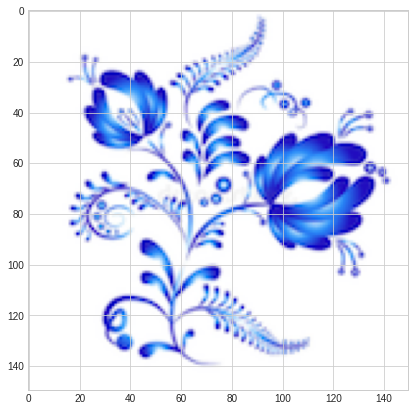

In [5]:
img=plist[2]
st='Image parameters: size - %s; shape - %s; type - %s'
print (st%(img.size,img.shape,img.dtype))
pl.imshow(img); pl.show()

## Simple Manipulations

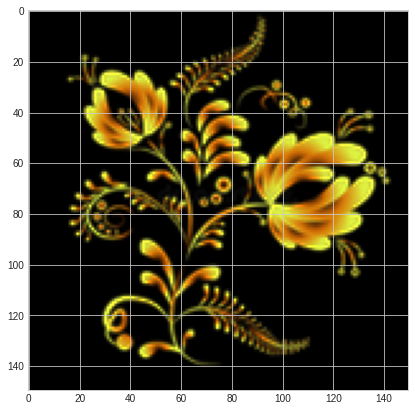

In [6]:
img_inv=cv2.bitwise_not(img)
pl.imshow(img_inv); pl.show()

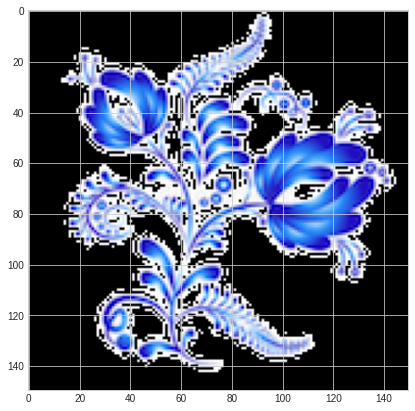

In [7]:
img_w2b=img.copy()
img_w2b[np.where((img_w2b==[255,255,255]).all(axis=2))]=[0,0,0]
pl.imshow(img_w2b); pl.show()

In [8]:
pl.rcParams['figure.figsize']=(14,7)
pl.figure(1); pl.subplot(121)
img_gray1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
pl.imshow(img_gray1)
pl.subplot(122)
img_gray2=cv2.cvtColor(img_w2b,cv2.COLOR_RGB2GRAY)
pl.imshow(img_gray2); pl.show()

In [9]:
pl.rcParams['figure.figsize']=(8,8); N=50
# skimage & opencv - grayscale, resize, invert
img_skgray=io.imread('pattern03.jpeg',as_gray=True)
img_skgray_resized=transform.resize(img_skgray,(N,N))
img_skgray_resized2=cv2.bitwise_not(img_skgray_resized)
img_cvgray_resized=cv2.resize(img_gray1,(N,N),
                              interpolation=cv2.INTER_CUBIC)
img_cvgray_resized2=cv2.bitwise_not(img_cvgray_resized)
pl.figure(1); pl.subplot(221)
pl.imshow(img_skgray_resized,cmap=pl.cm.Greys)
pl.subplot(222)
pl.imshow(img_skgray_resized2)
pl.subplot(223)
pl.imshow(img_cvgray_resized,cmap=pl.cm.Greys)
pl.subplot(224)
pl.imshow(img_cvgray_resized); pl.show()

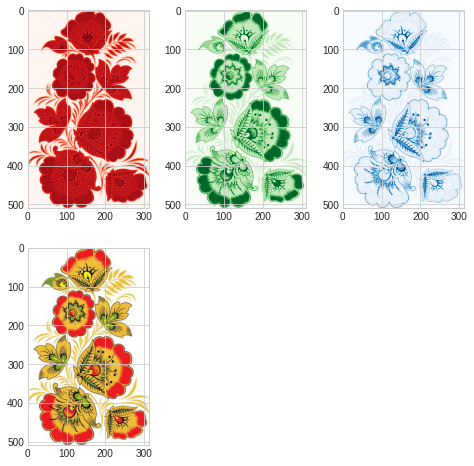

In [10]:
pl.rcParams['figure.figsize']=(8,8)
# split color channels
img0=plist[0]; b,g,r=cv2.split(img0)
# merge channels
img_merged=cv2.merge([b,g,r])
# display one of the channels
pl.figure(1); pl.subplot(231); pl.imshow(r,cmap=pl.cm.Reds_r)
pl.subplot(232); pl.imshow(g,cmap=pl.cm.Greens_r)
pl.subplot(233); pl.imshow(b,cmap=pl.cm.Blues_r)
# display merged image
pl.subplot(234); pl.imshow(img_merged); pl.show()

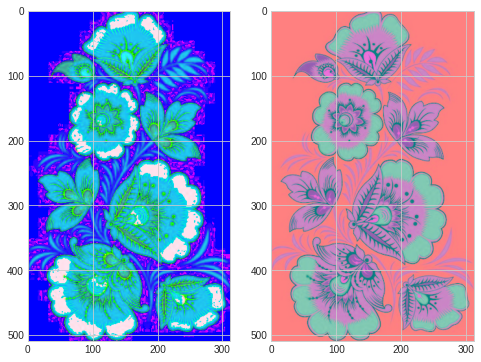

In [11]:
hsv_img=cv2.cvtColor(img0,cv2.COLOR_RGB2HSV_FULL)
lab_img=cv2.cvtColor(img0,cv2.COLOR_RGB2LAB)
pl.figure(1); pl.subplot(121); pl.imshow(hsv_img)
pl.subplot(122); pl.imshow(lab_img); pl.show()

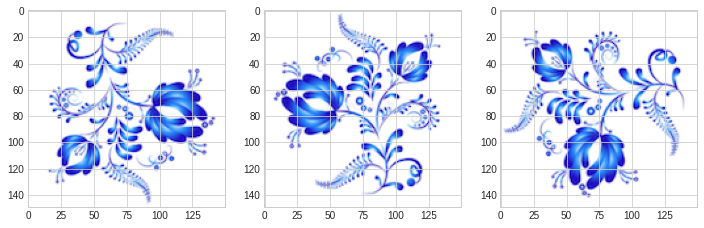

In [12]:
pl.rcParams['figure.figsize']=(12,4)
# flip images
img_vertical_flipped=cv2.flip(img,0)
img_horizontal_flipped=cv2.flip(img,1)
img_transposed=cv2.transpose(img)
pl.figure(1); pl.subplot(131); pl.imshow(img_vertical_flipped)
pl.subplot(132); pl.imshow(img_horizontal_flipped)
pl.subplot(133); pl.imshow(img_transposed); pl.show()

## Advanced Transformations

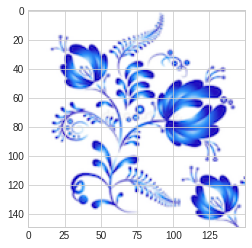

In [13]:
 # repeat the fragment
img_twice=img.copy()
img_fragment=img_twice[15:60,15:60]
img_twice[105:105+img_fragment.shape[0],105:105+\
          img_fragment.shape[1]]=img_fragment
pl.imshow(img_twice); pl.show()

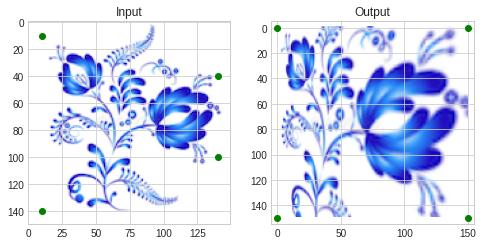

In [14]:
pl.rcParams['figure.figsize']=(8,4)
# perspective transformation
rows,cols,ch=img.shape
pts1=np.float32([[10,10],[140,40],[10,140],[140,100]])
pts2=np.float32([[0,0],[150,0],[0,150],[150,150]])
m=cv2.getPerspectiveTransform(pts1,pts2)
dst=cv2.warpPerspective(img,m,(150,150))
pl.subplot(121),pl.imshow(img),pl.title('Input')
pl.scatter(pts1[:,0],pts1[:,1],c='g')
pl.subplot(122),pl.imshow(dst),pl.title('Output')
pl.xlim(-5,155); pl.ylim(155,-5)
pl.scatter(pts2[:,0],pts2[:,1],c='g'); pl.show()

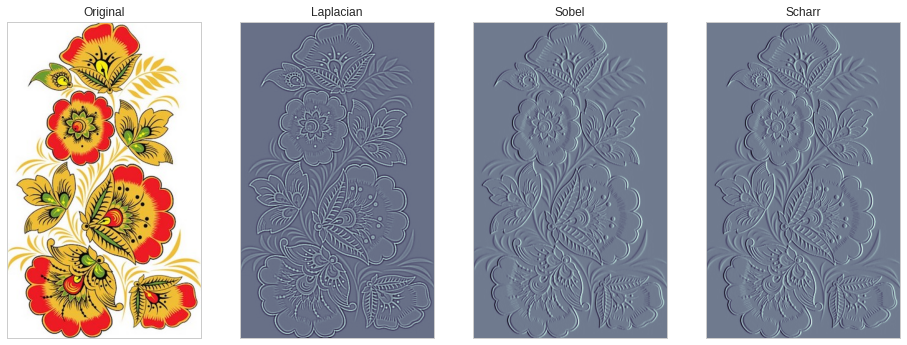

In [15]:
pl.rcParams['figure.figsize']=(16,8)
# gradient filters
img2=img0.copy()
img2_gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
laplacian=cv2.Laplacian(img2_gray,cv2.CV_64F,ksize=5)
sobel=cv2.Sobel(img2_gray,cv2.CV_64F,1,0,ksize=3)
scharr=cv2.Scharr(img2_gray,cv2.CV_64F,1,0)
pl.subplot(1,4,1),pl.imshow(img2)
pl.title('Original'),pl.xticks([]),pl.yticks([])
pl.subplot(1,4,2),pl.imshow(laplacian,cmap=pl.cm.bone)
pl.title('Laplacian'),pl.xticks([]),pl.yticks([])
pl.subplot(1,4,3),pl.imshow(sobel,cmap=pl.cm.bone)
pl.title('Sobel'),pl.xticks([]),pl.yticks([])
pl.subplot(1,4,4),pl.imshow(scharr,cmap=pl.cm.bone)
pl.title('Scharr'),pl.xticks([]),pl.yticks([]); pl.show()

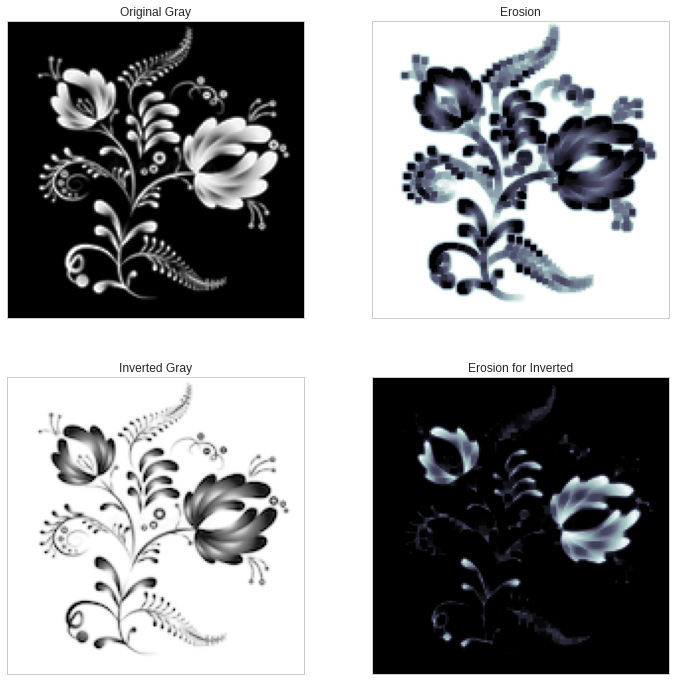

In [16]:
pl.rcParams['figure.figsize']=(12,12)
# erosion
kernel=np.ones((3,3),np.uint8)
erosion=cv2.erode(img_gray1,kernel,iterations=1)
pl.subplot(2,2,1),pl.imshow(img_gray1)
pl.title('Original Gray'),pl.xticks([]),pl.yticks([])
pl.subplot(2,2,2),pl.imshow(erosion,cmap=pl.cm.bone)
pl.title('Erosion'),pl.xticks([]),pl.yticks([])
img_gray1_inv=cv2.bitwise_not(img_gray1)
erosion_inv=cv2.erode(img_gray1_inv,kernel,iterations=1)
pl.subplot(2,2,3),pl.imshow(img_gray1_inv)
pl.title('Inverted Gray'),pl.xticks([]),pl.yticks([])
pl.subplot(2,2,4),pl.imshow(erosion_inv,cmap=pl.cm.bone)
pl.title('Erosion for Inverted')
pl.xticks([]),pl.yticks([]); pl.show()

In [17]:
# morphological gradient
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
pl.subplot(1,2,1),pl.imshow(img)
pl.title('Original Gray'),pl.xticks([]),pl.yticks([])
pl.subplot(1,2,2),pl.imshow(gradient,cmap=pl.cm.bone)
pl.title('Morphological Gradient')
pl.xticks([]),pl.yticks([]); pl.show()

## Edges' Detection

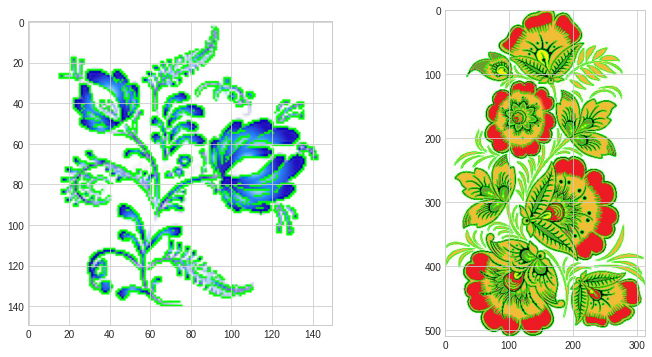

In [18]:
pl.rcParams['figure.figsize']=(12,6)
img_gray0=cv2.cvtColor(img0,cv2.COLOR_RGB2GRAY)
edge_img=img.copy(); edge_img0=img0.copy()
edge=cv2.Canny(img_gray1,90,240)
edge_img[edge!=0]=(0,255,0) 
edge0=cv2.Canny(img_gray0,90,240)
edge_img0[edge0!=0]=(0,255,0) 
pl.figure(1); pl.subplot(121); pl.imshow(edge_img)
pl.subplot(122); pl.imshow(edge_img0); pl.show()

## Key Points

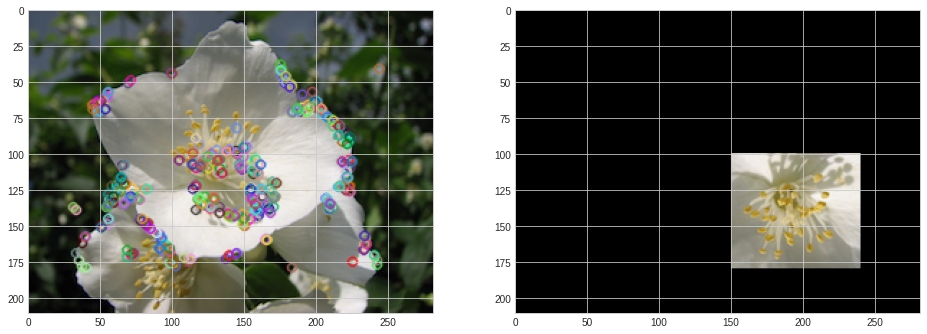

In [19]:
pl.rcParams['figure.figsize']=(16,6)
orb_img=flower_img.copy()
orb=cv2.ORB_create()
keypoints=orb.detect(orb_img,None)
keypoints,descriptors=orb.compute(orb_img,keypoints)
cv2.drawKeypoints(orb_img,keypoints,orb_img)
match_img=np.zeros(flower_img.shape,np.uint8)
center_img=flower_img[60:140,90:180] 
match_img[60:140,100:180]=[0,0,0] 
center_img=cv2.flip(center_img,0)
match_img[100:100+center_img.shape[0],
          150:150+center_img.shape[1]]=center_img
pl.figure(1); pl.subplot(121); pl.imshow(orb_img)
pl.subplot(122); pl.imshow(match_img); pl.show()

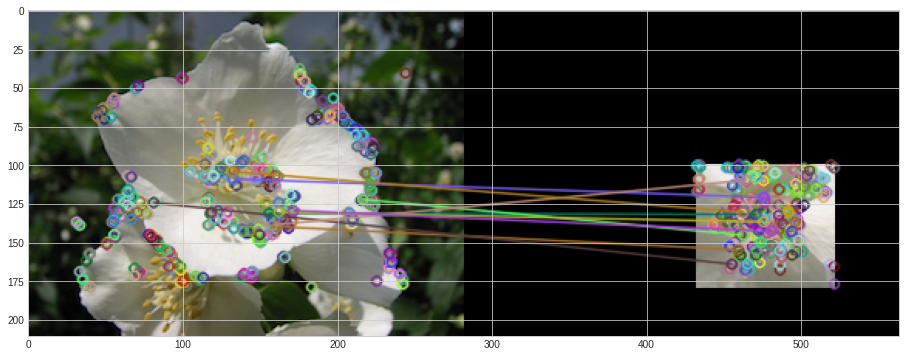

In [20]:
pl.rcParams['figure.figsize']=(16,6)
match_keypoints=orb.detect(match_img,None)
match_keypoints,match_descriptors=\
orb.compute(match_img,match_keypoints)
brute_force=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=brute_force.match(descriptors,match_descriptors)
matches=sorted(matches,key=lambda x:x.distance) 
draw_matches=cv2.drawMatches(orb_img,keypoints,
                             match_img,match_keypoints, 
                             matches[:9],orb_img)
pl.imshow(draw_matches); pl.show()

## Object Detection

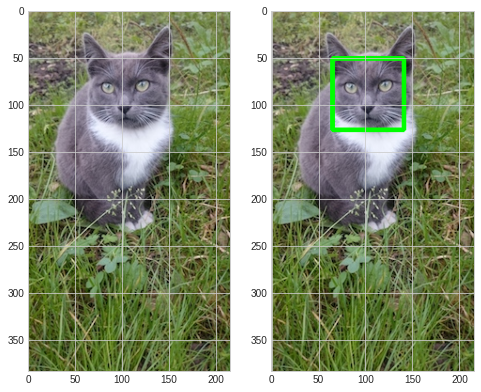

In [21]:
pl.rcParams['figure.figsize']=(8,8)
url='haarcascade_frontalcatface.xml'
input_file=urllib.request.urlopen(fpath+url)
output_file=open(url,'wb')
output_file.write(input_file.read())
output_file.close(); input_file.close()
gray_cat_img=cv2.cvtColor(cat_img,cv2.COLOR_RGB2GRAY)
catface_img=cat_img.copy()
catface_cascade=cv2.CascadeClassifier(url)
catfaces=catface_cascade.detectMultiScale(gray_cat_img,1.095,6)
for (x,y,w,h) in catfaces:
    cv2.rectangle(catface_img,(x,y),(x+w,y+h),(0,255,0),3)
pl.figure(1); pl.subplot(121); pl.imshow(cat_img)
pl.subplot(122); pl.imshow(catface_img); pl.show() 

In [22]:
pl.rcParams['figure.figsize']=(12,12)
sport_img=get_image('sport.jpg',flag=cv2.COLOR_BGR2RGB)
gray_sport_img=cv2.cvtColor(sport_img,cv2.COLOR_RGB2GRAY)
face_img=sport_img.copy()
url='haarcascade_frontalface_default.xml'
input_file=urllib.request.urlopen(fpath+url)
output_file=open(url,'wb')
output_file.write(input_file.read())
output_file.close(); input_file.close()
face_cascade=cv2.CascadeClassifier(url)
faces=face_cascade.detectMultiScale(gray_sport_img,1.095,4)
for (x,y,w,h) in faces:
     cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,255,0),3)
pl.figure(1); pl.subplot(211); pl.imshow(sport_img)
pl.subplot(212); pl.imshow(face_img); pl.show()